In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
train_set =  train_datagen.flow_from_directory('D:/cat and dog/train',
                                              target_size= (128,128),
                                              batch_size= 32,
                                              class_mode = 'binary')

Found 557 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_set =  test_datagen.flow_from_directory('D:/cat and dog/test',
                                              target_size= (128,128),
                                              batch_size= 32,
                                              class_mode = 'binary')

Found 140 images belonging to 2 classes.


In [4]:
cnn = tf.keras.models.Sequential()

FIRST LAYER


In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[128,128,3]))

Pooling 

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

SECOND LAYER

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

Flatting

In [8]:
cnn.add(tf.keras.layers.Flatten())

Full connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation= 'relu'))

Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

Training the CNN

In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(x = train_set,validation_data = test_set,epochs=25)

Epoch 1/25
18/18 [==============================] - 18s 919ms/step - loss: 0.9851 - accuracy: 0.4973 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/25
18/18 [==============================] - 14s 761ms/step - loss: 0.6925 - accuracy: 0.5171 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/25
18/18 [==============================] - 14s 760ms/step - loss: 0.6960 - accuracy: 0.5458 - val_loss: 0.6928 - val_accuracy: 0.5500
Epoch 4/25
18/18 [==============================] - 15s 834ms/step - loss: 0.6922 - accuracy: 0.5673 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 5/25
18/18 [==============================] - 15s 809ms/step - loss: 0.6889 - accuracy: 0.5727 - val_loss: 0.6831 - val_accuracy: 0.5714
Epoch 6/25
18/18 [==============================] - 15s 826ms/step - loss: 0.6723 - accuracy: 0.5853 - val_loss: 0.6609 - val_accuracy: 0.6500
Epoch 7/25
18/18 [==============================] - 15s 826ms/step - loss: 0.6591 - accuracy: 0.6014 - val_loss: 0.6855 - val_accuracy: 0.6357

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('D:\cat and dog/test/cats/cat_56.jpg',
                           target_size=(128,128))

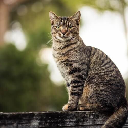

In [15]:
test_image

In [16]:
tf.keras.utils.img_to_array(test_image)

array([[[108.,  73.,  54.],
        [112.,  77.,  58.],
        [114.,  79.,  60.],
        ...,
        [190., 183., 154.],
        [201., 195., 171.],
        [207., 205., 180.]],

       [[114.,  79.,  59.],
        [118.,  83.,  63.],
        [120.,  85.,  65.],
        ...,
        [177., 171., 135.],
        [193., 188., 158.],
        [196., 189., 161.]],

       [[118.,  84.,  59.],
        [123.,  89.,  64.],
        [125.,  91.,  66.],
        ...,
        [158., 153., 111.],
        [177., 174., 133.],
        [189., 183., 147.]],

       ...,

       [[ 27.,  23.,  24.],
        [ 33.,  29.,  30.],
        [ 40.,  36.,  37.],
        ...,
        [ 33.,  33.,  35.],
        [ 33.,  33.,  35.],
        [ 41.,  41.,  41.]],

       [[ 44.,  43.,  39.],
        [ 55.,  51.,  48.],
        [ 67.,  62.,  59.],
        ...,
        [ 98.,  98.,  98.],
        [101., 101., 101.],
        [110., 110., 112.]],

       [[ 53.,  50.,  45.],
        [ 79.,  74.,  70.],
        [ 93.,  

In [17]:
test_image= np.expand_dims(test_image,axis=0)
test_image

array([[[[108,  73,  54],
         [112,  77,  58],
         [114,  79,  60],
         ...,
         [190, 183, 154],
         [201, 195, 171],
         [207, 205, 180]],

        [[114,  79,  59],
         [118,  83,  63],
         [120,  85,  65],
         ...,
         [177, 171, 135],
         [193, 188, 158],
         [196, 189, 161]],

        [[118,  84,  59],
         [123,  89,  64],
         [125,  91,  66],
         ...,
         [158, 153, 111],
         [177, 174, 133],
         [189, 183, 147]],

        ...,

        [[ 27,  23,  24],
         [ 33,  29,  30],
         [ 40,  36,  37],
         ...,
         [ 33,  33,  35],
         [ 33,  33,  35],
         [ 41,  41,  41]],

        [[ 44,  43,  39],
         [ 55,  51,  48],
         [ 67,  62,  59],
         ...,
         [ 98,  98,  98],
         [101, 101, 101],
         [110, 110, 112]],

        [[ 53,  50,  45],
         [ 79,  74,  70],
         [ 93,  85,  82],
         ...,
         [ 41,  41,  41],
        

In [18]:
result = cnn.predict(test_image)
result

1/1 [==============================] - 0s 104ms/step


array([[0.]], dtype=float32)

In [29]:
if result[0][0] == 1:
    prediction = 'dog'

else:
    prediction = 'cat'

In [30]:
print(prediction)

cat
